<a href="https://colab.research.google.com/github/Alan240124/Alan/blob/main/Atividade_Dataloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import torch
from torch.utils.data import DataLoader, Dataset


In [9]:
class MeuDataset(Dataset):
    def __init__(self, dados, labels):
        self.dados = dados
        self.labels = labels

    def __len__(self):
        return len(self.dados)

    def __getitem__(self, idx):
        # Retorna a amostra e o rótulo correspondente
        return self.dados[idx], self.labels[idx]


In [10]:
# Dados de exemplo
dados = torch.randn(100, 3)  # 100 amostras, 3 características cada
labels = torch.randint(0, 2, (100,))  # 100 rótulos binários

dataset = MeuDataset(dados, labels)

In [11]:
batch_size = 16
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)

In [12]:
for dados, labels in dataloader:
    # Aqui você pode processar os dados, como treinar o modelo
    print(dados.shape, labels.shape)  # Exemplo: exibir o tamanho dos batches

torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([4, 3]) torch.Size([4])


In [13]:
import torch
from torch.utils.data import DataLoader, Dataset

# Definindo o Dataset personalizado
class MeuDataset(Dataset):
    def __init__(self, dados, labels):
        self.dados = dados
        self.labels = labels

    def __len__(self):
        return len(self.dados)

    def __getitem__(self, idx):
        return self.dados[idx], self.labels[idx]

# Criando um dataset de exemplo
dados = torch.randn(100, 3)  # 100 amostras, cada uma com 3 características
labels = torch.randint(0, 2, (100,))  # 100 rótulos binários

dataset = MeuDataset(dados, labels)

# Criando o DataLoader
batch_size = 16
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)

# Iterando sobre o DataLoader
for dados, labels in dataloader:
    print(dados.shape, labels.shape)

torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([4, 3]) torch.Size([4])


In [14]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
class HeartSegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.image_names = sorted(os.listdir(image_dir))  # Listando nomes de arquivos

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        # Carrega imagem e máscara usando os nomes de arquivos
        img_path = os.path.join(self.image_dir, self.image_names[idx])
        mask_path = os.path.join(self.mask_dir, self.image_names[idx].replace(".png", "_mask.png"))

        image = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # Máscara em escala de cinza

        # Aplicando transformações
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

# Definindo transformações
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Tamanho padrão
    transforms.ToTensor()
])

# Criando o dataset
dataset = HeartSegmentationDataset(image_dir="/content/drive/MyDrive/DataSet/images", mask_dir="/content/drive/MyDrive/DataSet/masks", transform=transform)

In [15]:
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import os

# Exemplo de definição de um Dataset personalizado
class CustomDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform = transform
        self.images = os.listdir(images_dir)  # Lista de arquivos de imagem
        self.masks = os.listdir(masks_dir)    # Lista de arquivos de máscara

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        # Carregando a imagem e a máscara
        img_path = os.path.join(self.images_dir, self.images[idx])
        mask_path = os.path.join(self.masks_dir, self.masks[idx])

        image = Image.open(img_path)
        mask = Image.open(mask_path)

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

# Diretórios das imagens e máscaras
images_dir = '/content/drive/MyDrive/DataSet/images/'
masks_dir = '/content/drive/MyDrive/DataSet/masks/'

# Transformações (opcional)
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Inicializando o dataset
dataset = CustomDataset(images_dir, masks_dir, transform=transform)

# Criando o DataLoader
batch_size = 16
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Iterando sobre o dataloader
for images, masks in dataloader:
    print(images.shape)  # Exemplo: tamanho do batch de imagens
    print(masks.shape)   # Exemplo: tamanho do batch de máscaras


torch.Size([9, 1, 256, 256])
torch.Size([9, 1, 256, 256])


torch.Size([1, 256, 216])


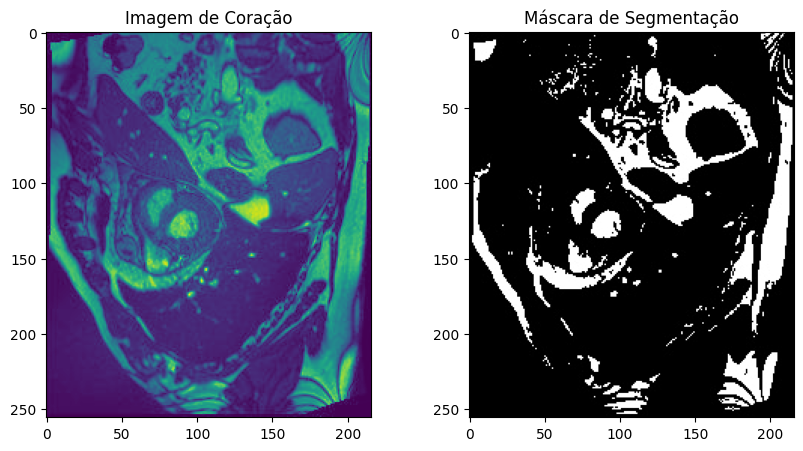

In [16]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image

# Carregando a imagem
image_path = '/content/drive/MyDrive/DataSet/images/image.0001.jpg'
image = Image.open(image_path)

# Convertendo a imagem para tensor
transform = transforms.ToTensor()
image_tensor = transform(image)

# Verificando a forma do tensor
print(image_tensor.shape)  # Deve ser [canais, altura, largura]

# Exibindo a imagem e a máscara
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Garantindo que o tensor está em formato HWC para exibição
ax[0].imshow(image_tensor.permute(1, 2, 0).numpy())  # Convertendo para formato HWC
ax[0].set_title("Imagem de Coração")

# Carregando a máscara (ajuste o caminho conforme necessário)
mask_path = '/content/drive/MyDrive/DataSet/masks/mask_image.0001.jpg'  # Substitua pelo caminho da sua máscara
mask = Image.open(mask_path).convert('L')  # Converte para escala de cinza
mask_tensor = transform(mask)  # Convertendo a máscara para tensor

# Exibindo a máscara em escala de cinza
ax[1].imshow(mask_tensor.squeeze(), cmap="gray")  # Exibindo a máscara
ax[1].set_title("Máscara de Segmentação")

plt.show()


Pastas 'images' e 'masks' verificadas/criadas com sucesso.


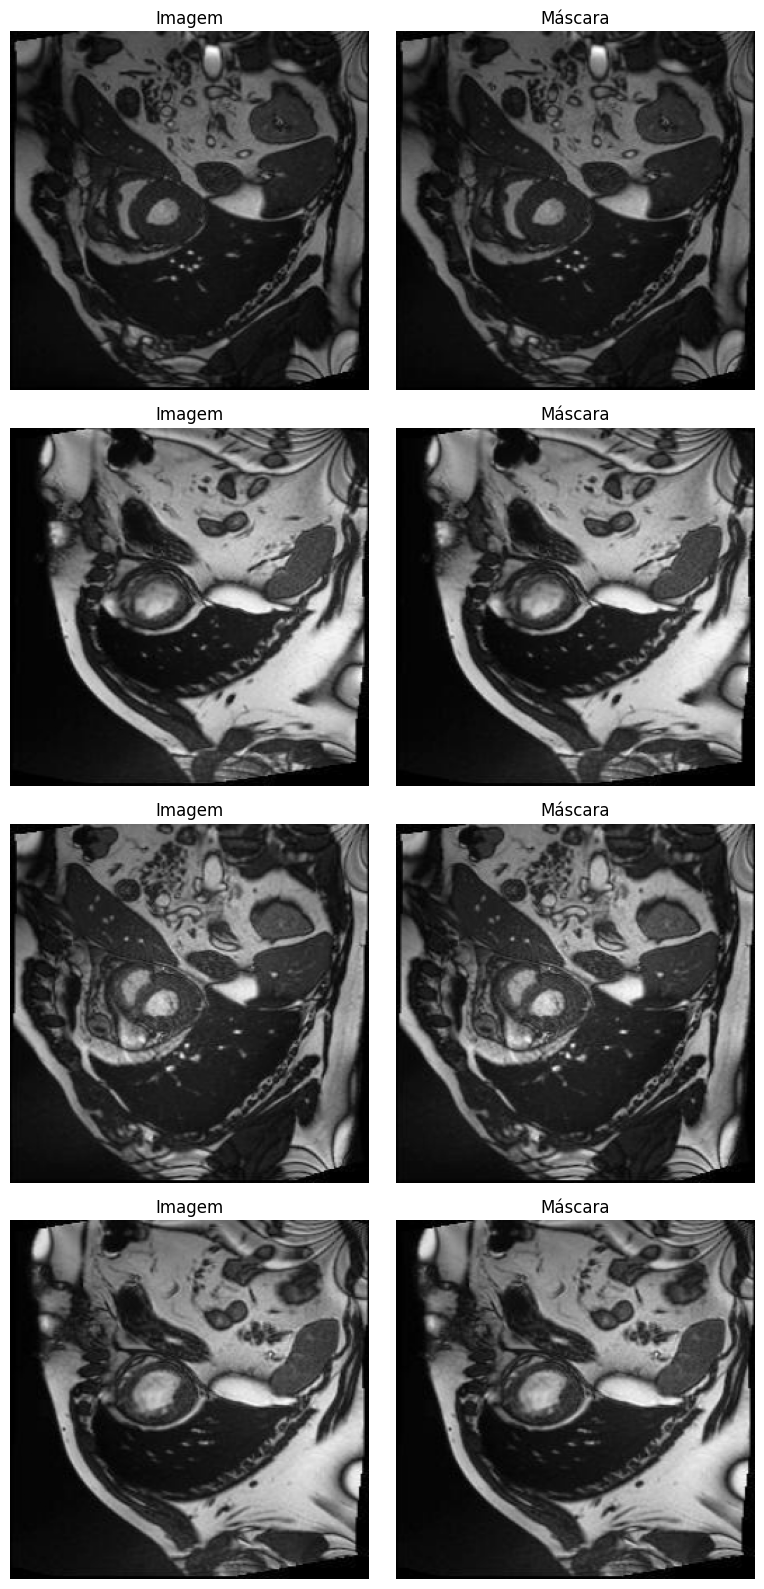

In [17]:
import os
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Caminho base do dataset de segmentação do coração
dataset_path = "/content/drive/MyDrive/Dataset2"


# Função para criar as pastas, caso não existam
def criar_pastas_dataset():
    os.makedirs(os.path.join(dataset_path, "images"), exist_ok=True)
    os.makedirs(os.path.join(dataset_path, "masks"), exist_ok=True)
    print("Pastas 'images' e 'masks' verificadas/criadas com sucesso.")

# Chama a função para garantir que as pastas existam
criar_pastas_dataset()

# Define uma classe personalizada para o dataset
class HeartSegmentationDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform = transform
        self.image_names = os.listdir(images_dir)  # lista de imagens

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        # Carrega a imagem e a máscara usando o índice
        image_path = os.path.join(self.images_dir, self.image_names[idx])
        mask_path = os.path.join(self.masks_dir, self.image_names[idx])

        # Abre as imagens como objetos PIL
        image = Image.open(image_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # Máscara em escala de cinza

        # Aplica as transformações, se houver
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask



# Define o caminho para as pastas de imagens e máscaras
images_dir = os.path.join(dataset_path, "images")
masks_dir = os.path.join(dataset_path, "masks")

# Transforma de exemplo (normalização e redimensionamento)
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Cria o DataLoader
heart_dataset = HeartSegmentationDataset(images_dir=images_dir, masks_dir=masks_dir, transform=transform)
dataloader = DataLoader(heart_dataset, batch_size=4, shuffle=True)



# Função para exibir um batch de imagens e máscaras
def visualizar_batch(dataloader):
    images, masks = next(iter(dataloader))  # Obtem um batch
    batch_size = images.size(0)
    epochs=10
    fig, axes = plt.subplots(batch_size, 2, figsize=(8, 4 * batch_size))
    for i in range(batch_size):
        # Converte a imagem e máscara para numpy para exibição
        image_np = images[i].permute(1, 2, 0).numpy()  # rearranja canais para [H, W, C]
        mask_np = masks[i].squeeze().numpy()           # remove dimensões extras

        # Exibe a imagem e a máscara
        axes[i, 0].imshow(image_np)
        axes[i, 0].set_title("Imagem")
        axes[i, 0].axis("off")

        axes[i, 1].imshow(mask_np, cmap="gray")
        axes[i, 1].set_title("Máscara")
        axes[i, 1].axis("off")

    plt.tight_layout()
    plt.show()

# Chama a função para exibir um batch de imagens e máscaras
visualizar_batch(dataloader)

In [18]:
import os

masks_dir = '/content/drive/MyDrive/DataSet/masks/'  # Ajuste conforme necessário
print("Arquivos na pasta de máscaras:", os.listdir(masks_dir))


Arquivos na pasta de máscaras: ['mask_image.0004.jpg', 'mask_image.0002.jpg', 'mask_image.0007.jpg', 'mask_image.0001.jpg', 'mask_image.0009.jpg', 'mask_image.0008.jpg', 'mask_image.0003.jpg', 'mask_image.0005.jpg', 'mask_image.0006.jpg', '.ipynb_checkpoints']


In [19]:
import os
import cv2
import glob as gb
from tqdm import tqdm

TRAIN_PATH = '/content/drive/MyDrive/DataSet'
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 1
X_train = []
Y_train = []

# Loop para carregar as imagens e máscaras
for folder in tqdm(os.listdir(TRAIN_PATH)):
    # Caminho para imagens
    image_files = gb.glob(os.path.join(TRAIN_PATH, folder, 'image', '*.png'))
    for file in image_files:
        img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)  # Lê a imagem em escala de cinza
        img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
        X_train.append(img)  # Não precisa converter para lista

    # Caminho para máscaras
    mask_files = gb.glob(os.path.join(TRAIN_PATH, folder, 'mask', '*.png'))
    for file in mask_files:
        img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)  # Lê a máscara em escala de cinza
        img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
        Y_train.append(img)  # Não precisa converter para lista

# Se você precisa que os dados sejam arrays NumPy
import numpy as np
X_train = np.array(X_train).reshape(-1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)  # Ajuste as dimensões
Y_train = np.array(Y_train).reshape(-1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)  # Ajuste as dimensões

# Verifica as dimensões finais
print("Dimensões de X_train:", X_train.shape)
print("Dimensões de Y_train:", Y_train.shape)


100%|██████████| 3/3 [00:00<00:00, 21.95it/s]

Dimensões de X_train: (0, 256, 256, 1)
Dimensões de Y_train: (0, 256, 256, 1)


In [20]:
import numpy as np

# Supondo que X_train e Y_train já foram definidos e preenchidos anteriormente
X_train = np.array(X_train)

# Verifica se X_train tem as dimensões corretas antes de empilhar
if X_train.ndim == 2:  # Se for uma imagem em escala de cinza
    X_train = np.stack((X_train,) * 3, axis=-1)  # Empilha para ter 3 canais (RGB)
elif X_train.ndim == 3 and X_train.shape[2] != 3:  # Se não tiver 3 canais
    raise ValueError("X_train deve ter 2 dimensões (altura, largura) ou 3 dimensões (altura, largura, canais).")

print("Dimensões de X_train:", X_train.shape)

# Converte Y_train para um array NumPy com tipo correto
Y_train = np.array(Y_train, dtype=np.bool_)  # Use np.bool_ em vez de np.bool
Y_train = Y_train.astype(np.uint8)  # Converte para 0 e 1 se precisar de binário
Y_train = np.expand_dims(Y_train, axis=-1)  # Adiciona uma dimensão para o canal

print("Dimensões de Y_train:", Y_train.shape)


Dimensões de X_train: (0, 256, 256, 1)
Dimensões de Y_train: (0, 256, 256, 1, 1)


In [21]:
X_train=X_train.astype(np.float32)
Y_train=Y_train.astype(np.float32)

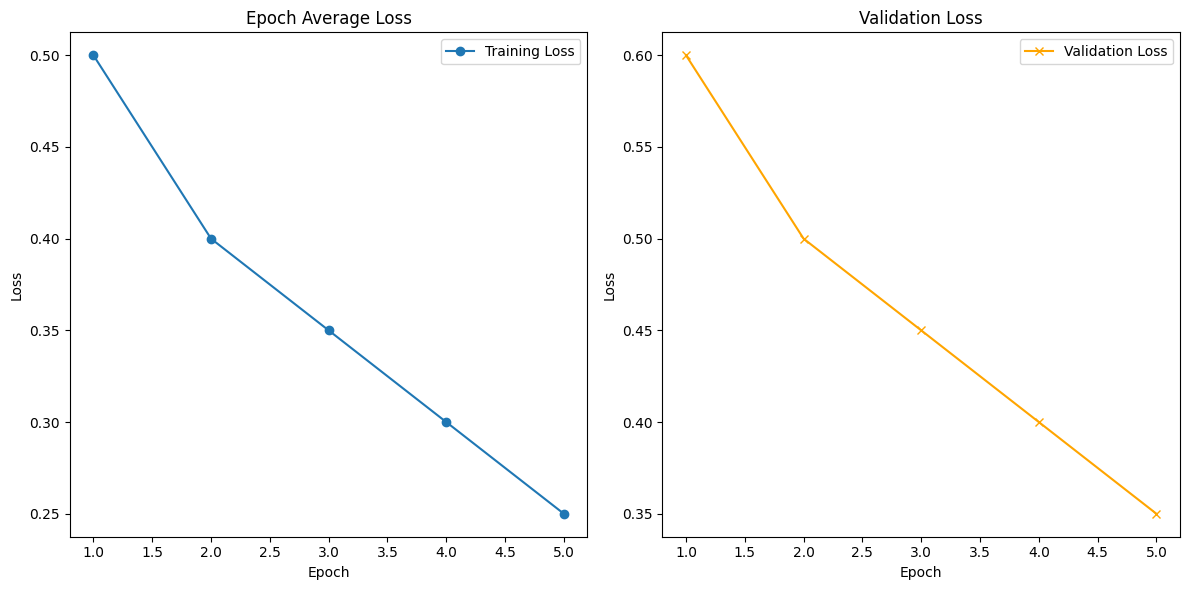

In [22]:
import matplotlib.pyplot as plt

# Exemplo de inicialização de variáveis
epoch_loss_values = [0.5, 0.4, 0.35, 0.3, 0.25]  # Exemplo de perdas de treinamento por época
losses_validation = [0.6, 0.5, 0.45, 0.4, 0.35]  # Exemplo de perdas de validação
val_interval = 1  # Intervalo de validação (pode ser ajustado conforme necessário)

# Criar a figura para plotar
plt.figure("train", (12, 6))

# Subplot para perda média por época
plt.subplot(1, 2, 1)
plt.title("Epoch Average Loss")
x_train = [i + 1 for i in range(len(epoch_loss_values))]
y_train = epoch_loss_values
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(x_train, y_train, marker='o', label='Training Loss')
plt.legend()

# Subplot para perda de validação
plt.subplot(1, 2, 2)
plt.title("Validation Loss")
x_val = [val_interval * (i + 1) for i in range(len(losses_validation))]
y_val = losses_validation
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(x_val, y_val, marker='x', color='orange', label='Validation Loss')
plt.legend()

# Mostrar os gráficos
plt.tight_layout()  # Melhora o layout
plt.show()


In [23]:
import torch.nn as nn
import torch.optim as optim

# Exemplo de definição de um modelo de rede neural convolucional simples
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 64 * 64, 256)  # Ajuste o tamanho conforme necessário
        self.fc2 = nn.Linear(256, 1)  # Saída para segmentação binária

    def forward(self, x):
        x = nn.ReLU()(self.conv1(x))
        x = nn.ReLU()(self.conv2(x))
        x = x.view(x.size(0), -1)  # Achata a saída
        x = nn.Sigmoid()(self.fc1(x))
        x = self.fc2(x)
        return x

# Inicialização do modelo
model = SimpleCNN()

# Definição da função de perda e do otimizador
criterion = nn.BCELoss()  # Se estiver usando saída binária
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [24]:
import os
import glob

data_dir = "/content/drive/MyDrive/DataSet"
train_images = sorted(glob.glob(os.path.join(data_dir, "images", "*/*.nii")))
train_labels = sorted(glob.glob(os.path.join(data_dir, "masks", "*/*.nii")))

data_dicts = [{"image": image_name, "label": label_name} for image_name, label_name in zip(train_images, train_labels)]
train_files, val_files = data_dicts[:-4], data_dicts[-4:]  # 16 train and 4 validation


In [25]:
import os
import glob

# Defina o diretório onde os dados estão armazenados
data_dir = "/content/drive/MyDrive/DataSet"

# Carregue e ordene as imagens e máscaras em formato NIfTI
train_images = sorted(glob.glob(os.path.join(data_dir, "images", "*/*.nii")))
train_labels = sorted(glob.glob(os.path.join(data_dir, "masks", "*/*.nii")))

# Crie uma lista de dicionários que associa cada imagem à sua máscara
data_dicts = [{"image": image_name, "label": label_name} for image_name, label_name in zip(train_images, train_labels)]

# Divida os dados em conjuntos de treinamento e validação
train_files, val_files = data_dicts[:-4], data_dicts[-4:]  # Aqui consideramos os últimos 4 para validação

# Exiba os resultados
print("Número de arquivos de treinamento:", len(train_files))
print("Número de arquivos de validação:", len(val_files))


Número de arquivos de treinamento: 0
Número de arquivos de validação: 0


In [28]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os

# 1. Definir a classe de dataset
class HeartSegmentationDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform = transform
        self.image_files = sorted(os.listdir(images_dir))
        self.mask_files = sorted(os.listdir(masks_dir))

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = os.path.join(self.images_dir, self.image_files[idx])
        mask_path = os.path.join(self.masks_dir, self.mask_files[idx])
        image = Image.open(image_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

# 2. Definir transformações
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# 3. Criar o dataset
images_dir = '/content/drive/MyDrive/DataSet/images'
masks_dir = '/content/drive/MyDrive/DataSet/masks'
dataset = HeartSegmentationDataset(images_dir, masks_dir, transform=transform)

# 4. Criar o DataLoader
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, num_workers=4)

# 5. Iterar sobre o DataLoader
for images, masks in dataloader:
    # Loop de treinamento ou validação
    pass


IsADirectoryError: Caught IsADirectoryError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/worker.py", line 351, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/fetch.py", line 52, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/fetch.py", line 52, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "<ipython-input-28-97215d57a2df>", line 22, in __getitem__
    mask = Image.open(mask_path).convert("L")
  File "/usr/local/lib/python3.10/dist-packages/PIL/Image.py", line 3431, in open
    fp = builtins.open(filename, "rb")
IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/DataSet/masks/.ipynb_checkpoints'


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 271, in _feed
    queue_sem.release()
ValueError: semaphore or lock released too many times
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 239

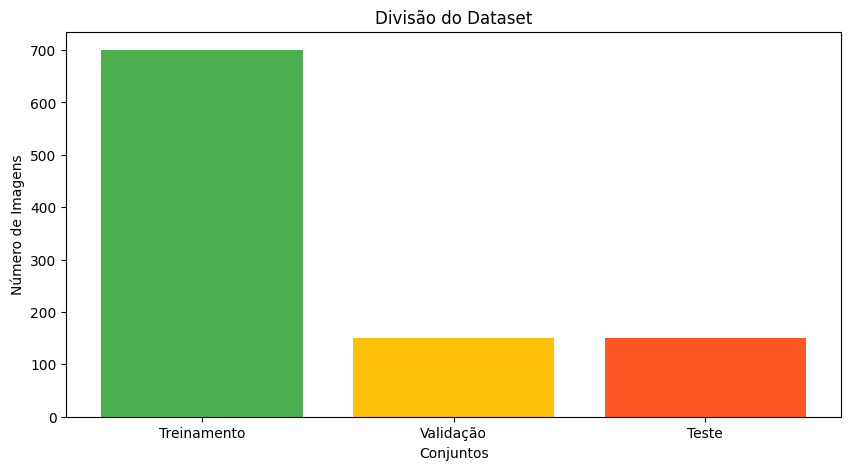

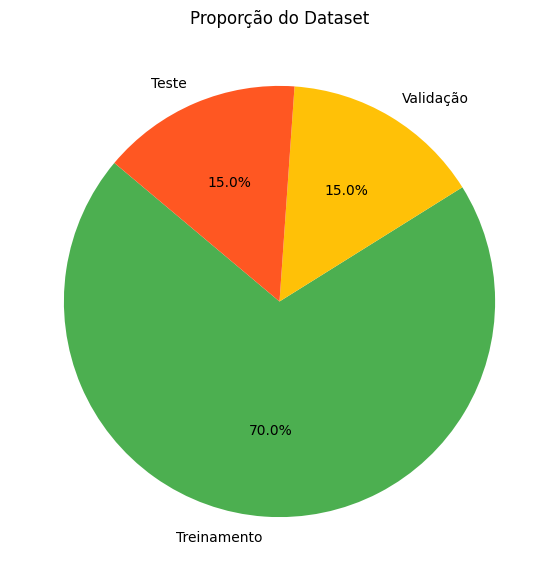

In [29]:
import matplotlib.pyplot as plt

# Definir tamanhos dos conjuntos
total_images = 1000  # Exemplo: dataset com 1000 imagens
train_size = int(0.7 * total_images)  # 70% para treinamento
val_size = int(0.15 * total_images)   # 15% para validação
test_size = total_images - train_size - val_size  # 15% para teste

# Dados para os gráficos
sizes = [train_size, val_size, test_size]
labels = ['Treinamento', 'Validação', 'Teste']
colors = ['#4CAF50', '#FFC107', '#FF5722']

# Gráfico de Barras
plt.figure(figsize=(10, 5))
plt.bar(labels, sizes, color=colors)
plt.title('Divisão do Dataset')
plt.xlabel('Conjuntos')
plt.ylabel('Número de Imagens')
plt.show()

# Gráfico de Pizza
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Proporção do Dataset')
plt.show()


Exibindo exemplos de cada conjunto:


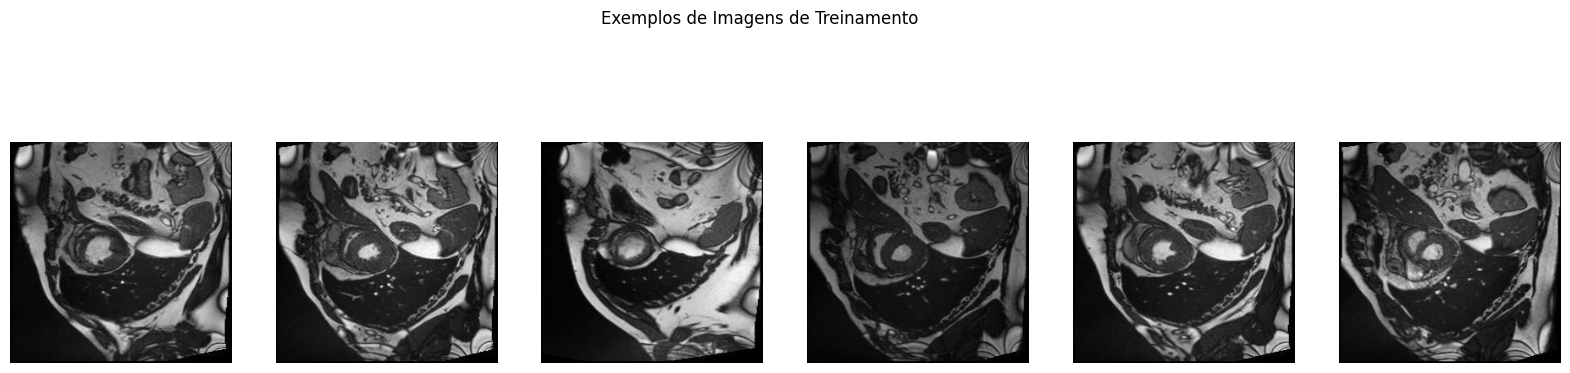

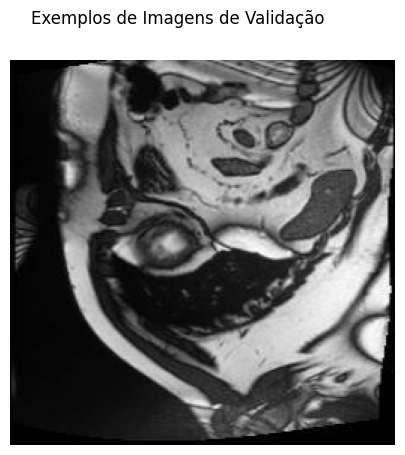

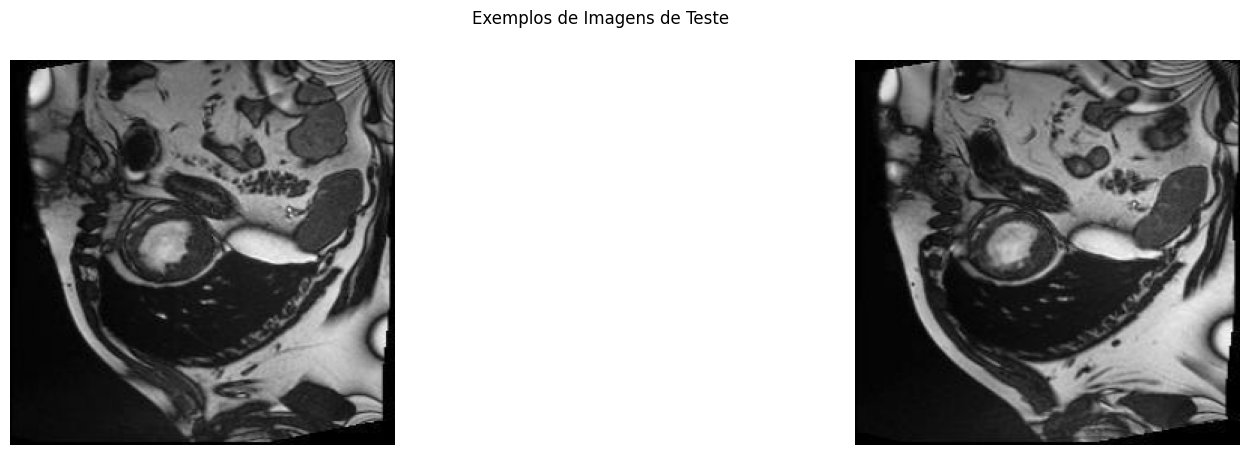

In [30]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from PIL import Image
import os
import matplotlib.pyplot as plt

# 1. Criar a classe de dataset personalizada
class HeartSegmentationDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform_image=None, transform_mask=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform_image = transform_image
        self.transform_mask = transform_mask
        # Filtrar apenas arquivos para evitar subdiretórios
        self.image_files = sorted([f for f in os.listdir(images_dir) if os.path.isfile(os.path.join(images_dir, f))])
        self.mask_files = sorted([f for f in os.listdir(masks_dir) if os.path.isfile(os.path.join(masks_dir, f))])

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = os.path.join(self.images_dir, self.image_files[idx])
        mask_path = os.path.join(self.masks_dir, self.mask_files[idx])
        image = Image.open(image_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")

        if self.transform_image:
            image = self.transform_image(image)
        if self.transform_mask:
            mask = self.transform_mask(mask)

        return image, mask

# 2. Configurar diretórios e transformações
images_dir = '/content/drive/MyDrive/DataSet/images'
masks_dir = '/content/drive/MyDrive/DataSet/masks'

# Transformação para imagens e máscaras
transform_image = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

transform_mask = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# 3. Criar o dataset e dividir em treino, validação e teste
dataset = HeartSegmentationDataset(images_dir, masks_dir, transform_image=transform_image, transform_mask=transform_mask)
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# 4. Criar DataLoaders para cada conjunto
batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

# 5. Exibir alguns exemplos de dados
def show_samples(dataloader, title):
    images, masks = next(iter(dataloader))
    num_images = images.size(0)  # Número real de imagens no lote

    # Cria uma figura com o número correto de subplots
    fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
    fig.suptitle(title)

    # Se num_images é 1, 'axes' não será uma lista, então ajustamos para ser iterável
    if num_images == 1:
        axes = [axes]

    for i in range(num_images):
        img = images[i].permute(1, 2, 0)  # Rearrange para exibição no matplotlib
        axes[i].imshow(img)
        axes[i].axis('off')
    plt.show()

# Exibir exemplos dos conjuntos
print("Exibindo exemplos de cada conjunto:")
show_samples(train_loader, "Exemplos de Imagens de Treinamento")
show_samples(val_loader, "Exemplos de Imagens de Validação")
show_samples(test_loader, "Exemplos de Imagens de Teste")


In [31]:
class HeartSegmentationDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform_image=None, transform_mask=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform_image = transform_image
        self.transform_mask = transform_mask
        self.image_files = sorted([f for f in os.listdir(images_dir) if f.endswith(('.png', '.jpg', '.jpeg'))])
        self.mask_files = sorted([f for f in os.listdir(masks_dir) if f.endswith(('.png', '.jpg', '.jpeg'))])

        # Verificar se o número de imagens e máscaras corresponde
        if len(self.image_files) != len(self.mask_files):
            raise ValueError(f"Número de imagens ({len(self.image_files)}) e máscaras ({len(self.mask_files)}) não correspondem.")

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = os.path.join(self.images_dir, self.image_files[idx])
        mask_path = os.path.join(self.masks_dir, self.mask_files[idx])

        # Verifica se o caminho da máscara é um arquivo
        if not os.path.isfile(mask_path):
            raise FileNotFoundError(f"Máscara não encontrada: {mask_path}")

        image = Image.open(image_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")

        if self.transform_image:
            image = self.transform_image(image)
        if self.transform_mask:
            mask = self.transform_mask(mask)

        return image, mask





In [32]:
# importing the required libraries
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# defining the Dataset class
class data_set(Dataset):
    def __init__(self):
        numbers = list(range(0, 100, 1))
        self.data = numbers

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index]


dataset = data_set()

# implementing dataloader on the dataset and printing per batch
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)
for i, batch in enumerate(dataloader):
    print(i, batch)

0 tensor([77, 84, 96,  0, 49, 48, 53, 35, 83, 67])
1 tensor([56,  9, 38, 34, 92, 15, 23, 57, 25, 52])
2 tensor([47, 82,  6, 22, 93, 19, 21, 86, 81, 76])
3 tensor([97, 45, 64,  4, 70, 13, 75, 63,  7, 79])
4 tensor([ 3, 11,  2, 61,  1, 36, 87, 99, 14, 91])
5 tensor([95, 43, 69, 41, 51, 37, 17, 44, 32, 28])
6 tensor([27, 40, 55, 71, 10,  5, 31, 73, 88, 68])
7 tensor([26, 98, 54, 62, 85, 80, 66, 12, 16, 78])
8 tensor([72, 50, 59,  8, 90, 24, 18, 65, 94, 74])
9 tensor([89, 46, 42, 60, 33, 58, 39, 20, 30, 29])


In [33]:

# importing the required libraries
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import seaborn as sns
from torch.utils.data import TensorDataset

# defining the dataset consisting of
# two columns from iris dataset
iris = sns.load_dataset('iris')
petal_length = torch.tensor(iris['petal_length'])
petal_width = torch.tensor(iris['petal_width'])
dataset = TensorDataset(petal_length, petal_width)

# implementing dataloader on the dataset
# and printing per batch
dataloader = DataLoader(dataset,
                        batch_size=5,
                        shuffle=True)

for i in dataloader:
    print(i)

[tensor([5.8000, 1.3000, 1.3000, 5.1000, 1.3000], dtype=torch.float64), tensor([2.2000, 0.2000, 0.3000, 1.6000, 0.2000], dtype=torch.float64)]
[tensor([4.1000, 5.2000, 4.4000, 5.0000, 1.4000], dtype=torch.float64), tensor([1.3000, 2.3000, 1.2000, 1.7000, 0.3000], dtype=torch.float64)]
[tensor([6.9000, 1.2000, 1.4000, 4.9000, 4.5000], dtype=torch.float64), tensor([2.3000, 0.2000, 0.2000, 2.0000, 1.3000], dtype=torch.float64)]
[tensor([4.9000, 3.7000, 4.1000, 5.1000, 3.9000], dtype=torch.float64), tensor([1.8000, 1.0000, 1.3000, 1.9000, 1.1000], dtype=torch.float64)]
[tensor([5.2000, 6.1000, 1.5000, 1.5000, 5.1000], dtype=torch.float64), tensor([2.0000, 2.3000, 0.2000, 0.3000, 2.4000], dtype=torch.float64)]
[tensor([4.4000, 1.4000, 4.7000, 5.6000, 5.1000], dtype=torch.float64), tensor([1.4000, 0.1000, 1.6000, 2.2000, 1.8000], dtype=torch.float64)]
[tensor([6.7000, 6.0000, 1.9000, 1.4000, 4.3000], dtype=torch.float64), tensor([2.2000, 1.8000, 0.2000, 0.2000, 1.3000], dtype=torch.float64)]

In [34]:
import os
import glob

data_dir = "/content/drive/MyDrive/DataSet"

# Acesse as imagens e os rótulos
train_images = sorted(glob.glob(os.path.join(data_dir, "imagesTr", "*/*.nii")))
train_labels = sorted(glob.glob(os.path.join(data_dir, "labelsTr", "*/*.nii")))

# Corrigido: use 'for' ao invés de 'para' e 'in' ao invés de 'em' (em português)
data_dicts = [{"image": image_name, "label": label_name} for image_name, label_name in zip(train_images, train_labels)]

# Divide os arquivos em treinamento e validação
train_files, val_files = data_dicts[:-4], data_dicts[-4:]  # 16 train e 4 arquivos de validação

train_files  # Para exibir os arquivos de treino




[]

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Definição da CNN
class HeartSegmentationCNN(nn.Module):
    def __init__(self):
        super(HeartSegmentationCNN, self).__init__()

        # Camada convolucional 1
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

        # Camadas de pooling
        self.pool = nn.MaxPool2d(2, 2)

        # Camada totalmente conectada (para segmentação)
        self.conv_out = nn.Conv2d(64, 1, kernel_size=1)  # A última camada deve ter 1 saída (máscara binária)

    def forward(self, x):
        # Passando pelas camadas convolucionais + ReLU + Pooling
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        # Segmentação final com a camada convolucional de saída
        x = torch.sigmoid(self.conv_out(x))  # Aplique Sigmoid para obter valores de probabilidade entre 0 e 1

        return x


In [36]:
model.summary()

AttributeError: 'SimpleCNN' object has no attribute 'summary'

In [37]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.SGD(0.000001), metrics=['accuracy'])

NameError: name 'keras' is not defined

In [38]:
# Instanciar o modelo
model = HeartSegmentationCNN()

# Definir o otimizador e a função de perda
criterion = nn.BCELoss()  # Função de perda para segmentação binária
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [39]:
# Definir dispositivo (GPU se disponível)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Função de treinamento
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    model.train()  # Colocar o modelo em modo de treinamento

    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, masks in train_loader:
            images, masks = images.to(device), masks.to(device)

            # Limpar gradientes
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            outputs = outputs.squeeze(1)  # Remover dimensão extra da saída
            loss = criterion(outputs, masks)

            # Backward pass e otimização
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Exibir estatísticas por época
        print(f"Época {epoch+1}/{num_epochs}, Perda: {running_loss/len(train_loader)}")

        # Validação ao final de cada época (opcional)
        validate_model(model, val_loader, criterion)

    print("Treinamento finalizado!")

# Função de validação (opcional, para acompanhar desempenho em validação)
def validate_model(model, val_loader, criterion):
    model.eval()  # Colocar o modelo em modo de avaliação
    val_loss = 0.0
    with torch.no_grad():
        for images, masks in val_loader:
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)
            outputs = outputs.squeeze(1)
            loss = criterion(outputs, masks)
            val_loss += loss.item()

    print(f"Perda na validação: {val_loss / len(val_loader)}")
    model.train()  # Voltar ao modo de treinamento após validação


In [45]:
# Treinar o modelo por 10 épocas
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)


ValueError: Using a target size (torch.Size([6, 1, 256, 256])) that is different to the input size (torch.Size([6, 32, 32])) is deprecated. Please ensure they have the same size.

In [41]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset

# Exemplo de Dataset, substitua pelo seu próprio dataset
class SeuDatasetDeTreinamento(Dataset):
    def __init__(self):
        # Inicialize seus dados aqui
        pass

    def __len__(self):
        return len(self.dados)

    def __getitem__(self, idx):
        # Retorne a amostra de dados e o rótulo (label)
        return self.dados[idx], self.labels[idx]

# Criar datasets de treino e validação
train_dataset = SeuDatasetDeTreinamento()
val_dataset = SeuDatasetDeTreinamento()  # Substitua se tiver um conjunto separado

# Criar DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Definir o modelo, critério e otimizador
model = nn.Sequential(
    nn.Linear(10, 50),  # Exemplo, ajuste conforme sua arquitetura
    nn.ReLU(),
    nn.Linear(50, 2)    # Número de classes de saída
)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Definir a função de treinamento
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()  # Modo de treino
        running_loss = 0.0
        for inputs, labels in train_loader:
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Validação
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}, Val Loss: {val_loss:.4f}")

# Treinar o modelo por 10 épocas
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)


AttributeError: 'SeuDatasetDeTreinamento' object has no attribute 'dados'